<a href="https://colab.research.google.com/github/Kikiowotobi/test/blob/main/Assignment_2_Kikiowo_Oluwatobiloba_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random

# Function to scrape IMDb for movie ratings
def scrape_imdb(year, page):
    base_url = f'https://www.imdb.com/search/title/?release_date={year}&sort=num_votes,desc&page={page}'
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

    # Send a GET request to the URL
    response = requests.get(base_url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract information based on the structure of the IMDb page

        movie_list = soup.find_all('div', class_='lister-item')

        for movie in movie_list:
            title = movie.h3.a.text
            imdb_rating = movie.strong.text
            metascore = movie.find('span', class_='metascore').text.strip() if movie.find('span', class_='metascore') else 'N/A'

            # Print or store the information as needed
            print(f'Title: {title}, IMDb Rating: {imdb_rating}, Metascore: {metascore}')

    else:
        # Throw a warning for non-200 status codes
        print(f'Warning: Non-200 status code ({response.status_code}) for {base_url}')




In [ ]:
# Define the range of years and pages
years_url = range(2010, 2021)
pages = range(1, 6)  # You may need to adjust the number of pages based on the actual structure of the IMDb page

# Counter for the number of requests
request_count = 0

# Loop through the years
for year in years_url:
    # Loop through the pages
    for page in pages:
        # Call the scraping function
        scrape_imdb(year, page)

        # Increment the request count
        request_count += 1

        # Pause the loop for a time interval between 8 and 15 seconds
        time.sleep(random.uniform(8, 15))

        # Break the loop if the number of requests is greater than 70
        if request_count >= 70:
            break

    if request_count >= 70:
        break

In [ ]:
# Create an empty DataFrame to hold the information
columns = ['Title', 'Year', 'IMDb Rating', 'Metascore', 'Votes']
movie_data = pd.DataFrame(columns=columns)

# Define the range of years and pages
years_url = range(2010, 2021)
pages = range(1, 6)  # You may need to adjust the number of pages based on the actual structure of the IMDb page

# Counter for the number of requests
request_count = 0

# Loop through the years
for year in years_url:
    # Loop through the pages
    for page in pages:
        # Call the scraping function and update the DataFrame
        movie_data = scrape_imdb(year, page, movie_data)

        # Increment the request count
        request_count += 1

        # Pause the loop for a time interval between 8 and 15 seconds
        time.sleep(random.uniform(8, 15))

        # Break the loop if the number of requests is greater than 70
        if request_count >= 70:
            break

    if request_count >= 70:
        break

# Write the DataFrame to a CSV file
movie_data.to_csv('movie_ratings.csv', index=False)

TypeError: scrape_imdb() takes 2 positional arguments but 3 were given

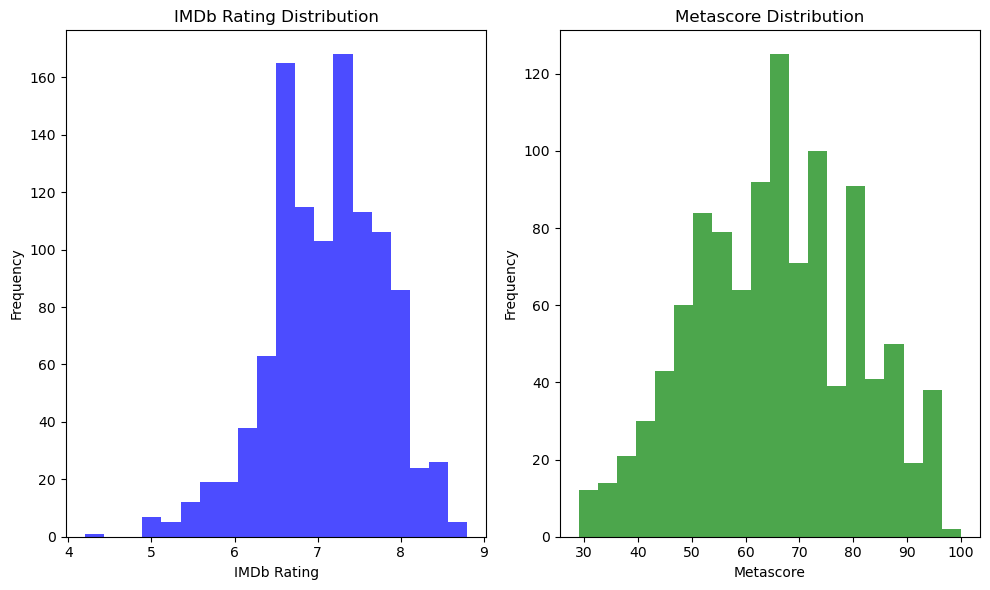

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
movie_data = pd.read_csv('movie_ratings.csv')

# Convert IMDb Rating and Metascore columns to numeric
movie_data['IMDb Rating'] = pd.to_numeric(movie_data['IMDb Rating'], errors='coerce')
movie_data['Metascore'] = pd.to_numeric(movie_data['Metascore'], errors='coerce')

# Group by Year and calculate the average IMDb Rating and Metascore
average_ratings = movie_data.groupby('Year').agg({'IMDb Rating': 'mean', 'Metascore': 'mean'}).reset_index()

# Plotting histograms
plt.figure(figsize=(10, 6))

# Histogram for IMDb Rating
plt.subplot(1, 2, 1)
plt.hist(movie_data['IMDb Rating'], bins=20, color='blue', alpha=0.7)
plt.title('IMDb Rating Distribution')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

# Histogram for Metascore
plt.subplot(1, 2, 2)
plt.hist(movie_data['Metascore'], bins=20, color='green', alpha=0.7)
plt.title('Metascore Distribution')
plt.xlabel('Metascore')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()